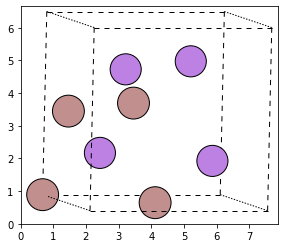

BandPath(path='GXMGRX,MR', cell=[3x3], special_points={GMRX}, kpts=[21x3])

In [2]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
import ase.spacegroup
from ase.spacegroup import crystal
from ase.visualize import view
from ase.io.cif import read_cif
from ase.io.xyz import write_xyz
from ase.io import read, write
from ase.build import make_supercell, bulk
import numpy as np
from ase import Atoms
from ase.lattice import *
from ase.dft.kpoints import *
from ase.optimize import BFGS,LBFGS
from gpaw import GPAW, PW, FermiDirac
from ase.constraints import ExpCellFilter


plt.rcParams['axes.facecolor']= 'none'
plt.rcParams['figure.facecolor'] = 'none'


a = 5.628  # Lattice parameter
GaAs = crystal(['Ga','As'],
                basis=[(0,0,0),(0.25,0.25,0.25)],
                spacegroup=216,
                cellpar=[a,a,a,90,90,90]
              )
fig, ax = plt.subplots()
plot_atoms(GaAs,
           ax,
           radii=0.4,
           rotation='5x,15y,0z',
            )

plt.show()
bp = GaAs.cell.bandpath()
path = GaAs.cell.bandpath()
path


In [3]:
calc =  GPAW(mode=PW(800), kpts=[5,5,5],txt='GaAs001.txt')
GaAs.calc = calc
opt = BFGS(ExpCellFilter(GaAs))
opt.run(fmax=0.05)

RuntimeError: Could not find required PAW dataset file "Ga.LDA".

You need to set the GPAW_SETUP_PATH environment variable to point to
the directories where PAW dataset and basis files are stored.  See
https://wiki.fysik.dtu.dk/gpaw/install.html#install-paw-datasets
for details.


In [31]:
e = atoms.get_potential_energy()
ef = calc.get_fermi_level()
calc.write('GaAs001.gpw')


(-2.0, 3.0)

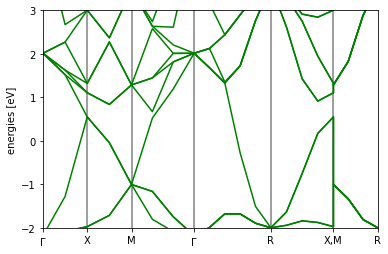

In [37]:
GaAs = calc.band_structure()
GaAs.plot(emax=5.0)
plt.ylim([-2,3])

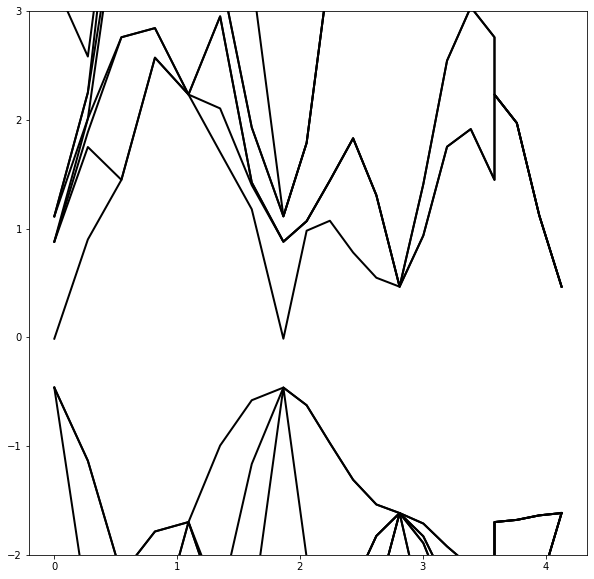

In [38]:
kpts = path.kpts
(x, X, labels) = path.get_linear_kpoint_axis()
e_kn = np.array([calc.get_eigenvalues(kpt=k)
                 for k in range(len(calc.get_ibz_k_points()))])
ef = GPAW('GaAs001.gpw', txt=None).get_fermi_level()

e_nk = e_kn.T
e_nk -= ef


plt.figure(figsize=(10,10))
for e_k in e_nk:
    plt.plot(x,e_k, '-', c='k',lw=2)
plt.ylim([-2,3])
plt.show()

In [63]:
X

array([0.        , 0.77265084, 1.31899748, 2.09164832])